In [28]:
import scipy as sp

data = sp.genfromtxt("web_traffic.tsv",delimiter= "\t")

In [8]:
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [10]:
print (data.shape)

(743, 2)


In [15]:
data

array([[1.000e+00, 2.272e+03],
       [2.000e+00,       nan],
       [3.000e+00, 1.386e+03],
       ...,
       [7.410e+02, 5.392e+03],
       [7.420e+02, 5.906e+03],
       [7.430e+02, 4.881e+03]])

In [17]:
x=data[:,0]
y=data[:,1]

x=x[~sp.isnan(y)]
y=y[~sp.isnan(y)]

In [18]:
print(x[:10])
print(y[:10])



[ 1.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[2272. 1386. 1365. 1488. 1337. 1883. 2283. 1335. 1025. 1139.]


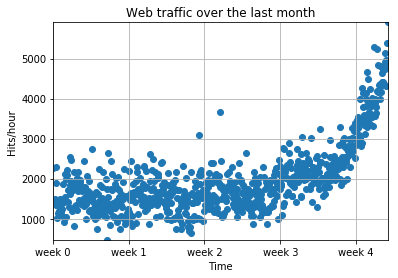

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.xticks(
    [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

plt.autoscale(tight=True)
plt.grid()
plt.show()


In [31]:
import numpy as np
fp1 , rediduals,rank,sv,rcond = sp.polyfit(x,y,1,full=True)

In [34]:
def error(f,x,y):
    return sp.sum((f(x) -y)**2)


In [37]:
f1 = sp.poly1d(fp1)
print(error(f1,x,y))

317389767.339778


In [43]:
f2p = sp.polyfit(x,y,2)
f2 = sp.poly1d(f2p)
print(f2p)

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


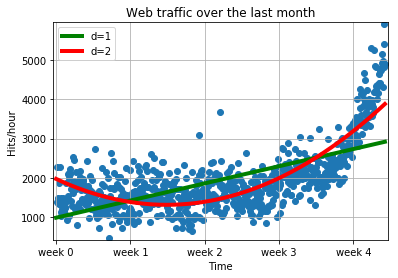

In [47]:
fx = sp.linspace(0,x[-1],1000)
plt.plot(fx,f1(fx),linewidth=4,color="green")
plt.plot(fx,f2(fx),linewidth=4,color="red")
plt.legend(["d=%i"%f1.order,"d=%i"%f2.order],loc="upper left")

plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.xticks(
    [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

plt.autoscale(tight=True)
plt.grid()
plt.show()

In [54]:
#inf = int(3.5*7*24)
inf=7*12*7
xa = x[:inf]
ya = y[:inf]
xb = x[inf:]
yb = y[inf:]
fa = sp.poly1d(sp.polyfit(xa,ya,2))
print(fa)
from scipy.optimize import fsolve
reached_max = fsolve(fa-100000,800)/(7*24)
print(reached_max)

          2
0.004415 x - 1.805 x + 1666
[29.33346678]


[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]
(743, 2)
Number of invalid entries: 8
Model parameters of fp1: [  2.59619213 989.02487106]
Error of the model of fp1: [3.17389767e+08]
Model parameters of fp2: [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
Error of the model of fp2: [1.79983508e+08]


/usr/local/lib/python3.6/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:76: RankWarning: Polyfit may be poorly conditioned


Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363576
Error d=53: 109452414.423717
Errors for only the time after inflection point
Error d=1: 145045835.134473
Error d=2: 61116348.809620
Error d=3: 33214248.905598
Error d=10: 21611594.264967
Error d=53: 18656113.124782
Error inflection=132950348.197616
Trained only on data after inflection point
Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.597712
Error d=53: 18300719.772609


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:121: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:122: RankWarning: Polyfit may be poorly conditioned


fbt2(x)= 
       2
0.086 x - 94.02 x + 2.744e+04
fbt2(x)-100,000= 
       2
0.086 x - 94.02 x - 7.256e+04
Test errors for only the time after inflection point
Error d=1: 6397694.386394
Error d=2: 6010775.401243
Error d=3: 6047678.658525
Error d=10: 7037910.453846
Error d=53: 7052523.035660


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:145: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:146: RankWarning: Polyfit may be poorly conditioned


       2
0.086 x - 94.02 x + 2.744e+04
       2
0.086 x - 94.02 x - 7.256e+04
100,000 hits/hour expected at week 9.616071


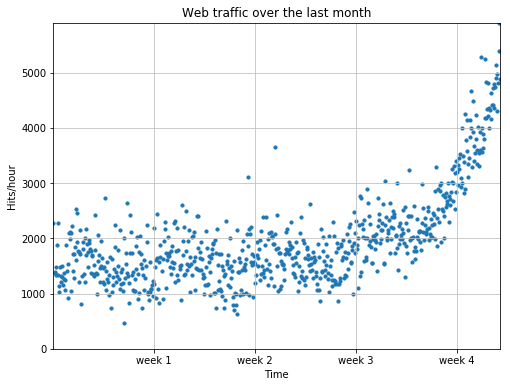

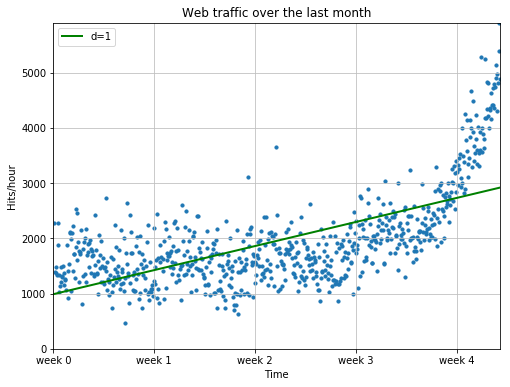

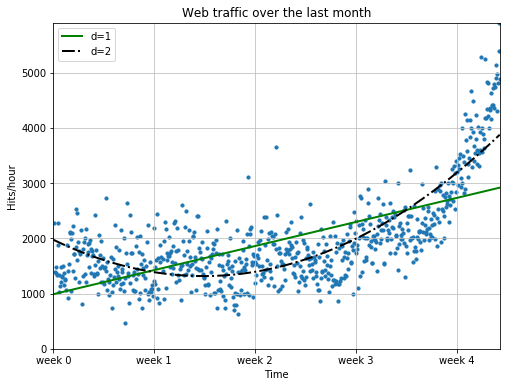

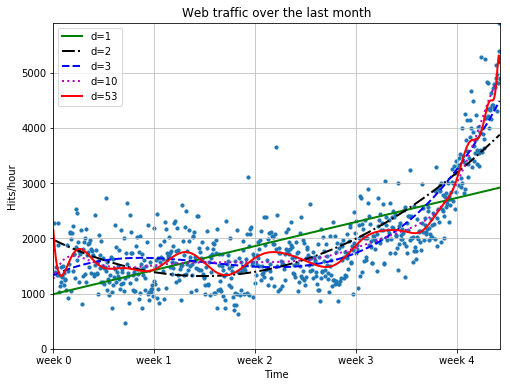

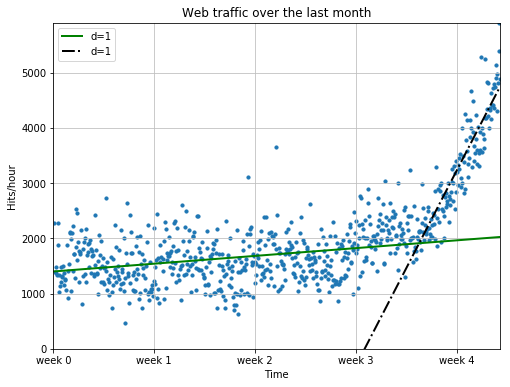

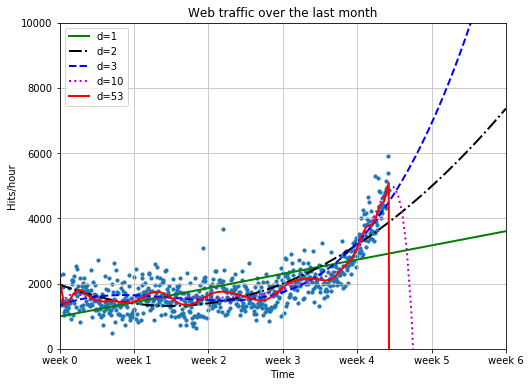

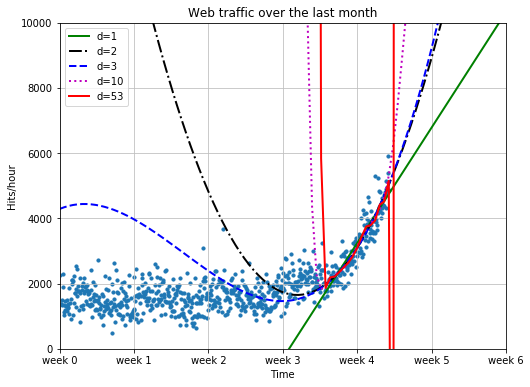

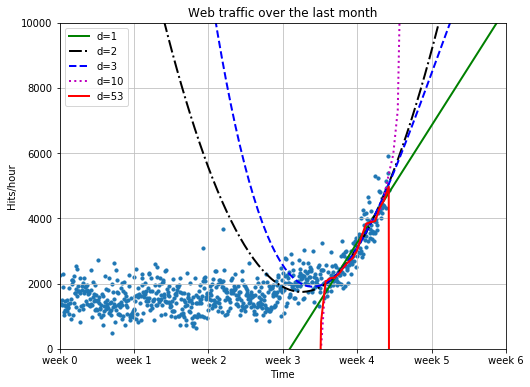

In [57]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import os
from utils import DATA_DIR, CHART_DIR
import scipy as sp
import matplotlib.pyplot as plt

sp.random.seed(3)  # to reproduce the data later on

data = sp.genfromtxt(os.path.join(DATA_DIR, "web_traffic.tsv"), delimiter="\t")
print(data[:10])
print(data.shape)

# all examples will have three classes in this file
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

x = data[:, 0]
y = data[:, 1]
print("Number of invalid entries:", sp.sum(sp.isnan(y)))
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]


def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

# first look at the data
plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))

# create and plot models
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True)
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = sp.polyfit(x, y, 2, full=True)
print("Model parameters of fp2: %s" % fp2)
print("Error of the model of fp2:", res2)
f2 = sp.poly1d(fp2)
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))
f100 = sp.poly1d(sp.polyfit(x, y, 100))

plot_models(x, y, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))
plot_models(
    x, y, [f1, f2, f3, f10, f100], os.path.join(CHART_DIR, "1400_01_04.png"))

# fit and plot a model using the knowledge about inflection point
inflection = int(3.5 * 7 * 24)
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))


def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errors for only the time after inflection point")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error inflection=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))


# extrapolating into the future
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    os.path.join(CHART_DIR, "1400_01_06.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))

print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    os.path.join(CHART_DIR, "1400_01_07.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

# separating training from testing data
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])


In [58]:
z=[2,3,4]
z[-1]

4